## Regularization parameter: Lasso
The  λ  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  λ  is too large, all parameters will be set to zero.

Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2  for a given lambda value?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


In [77]:
modelstuff = pd.DataFrame()
modelstuff['alpha'] = [.01,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

In [78]:
l = []
for x in modelstuff['alpha']:
    lass = linear_model.Lasso(alpha=x)
    lassfit = lass.fit(X_train2, Y_train)
    l.append(lass.score(X_train2, Y_train))
#origparams = np.append(lassfit.coef_, lassfit.intercept_)
#print('\nParameter estimates for the model with few features:')
#print(origparams)
modelstuff['R2_lasso_score'] = l

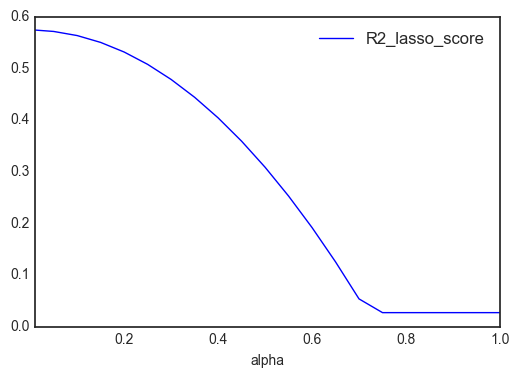

In [79]:
modelstuff.plot(x='alpha', y='R2_lasso_score')

In [80]:
modelstuff2 = pd.DataFrame()
modelstuff2['alpha'] = [.01,1,5,10,25,50,75,100,250,500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000]
l = []
for x in modelstuff2['alpha']:
    ridgeregr = linear_model.Ridge(alpha=x, fit_intercept=False)
    ridgeregr.fit(X_train2, Y_train)
    l.append(ridgeregr.score(X_train2, Y_train))
modelstuff2['R2_ridge_score'] = l
modelstuff2

,alpha,R2_ridge_score
0,0.01,0.573972
1,1.00,0.573969
2,5.00,0.573955
3,10.00,0.573946
4,25.00,0.573928
5,50.00,0.573879
6,75.00,0.573803
7,100.00,0.573698
8,250.00,0.572522
9,500.00,0.568831


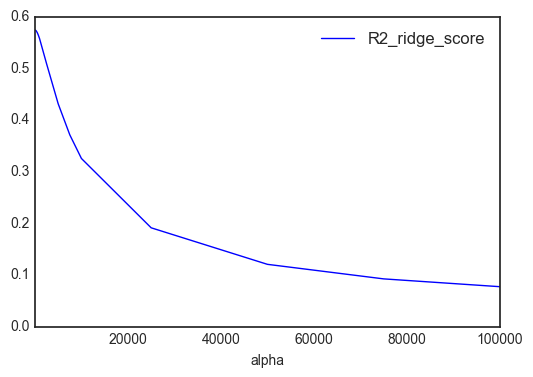

In [81]:
modelstuff2.plot(x='alpha', y='R2_ridge_score')